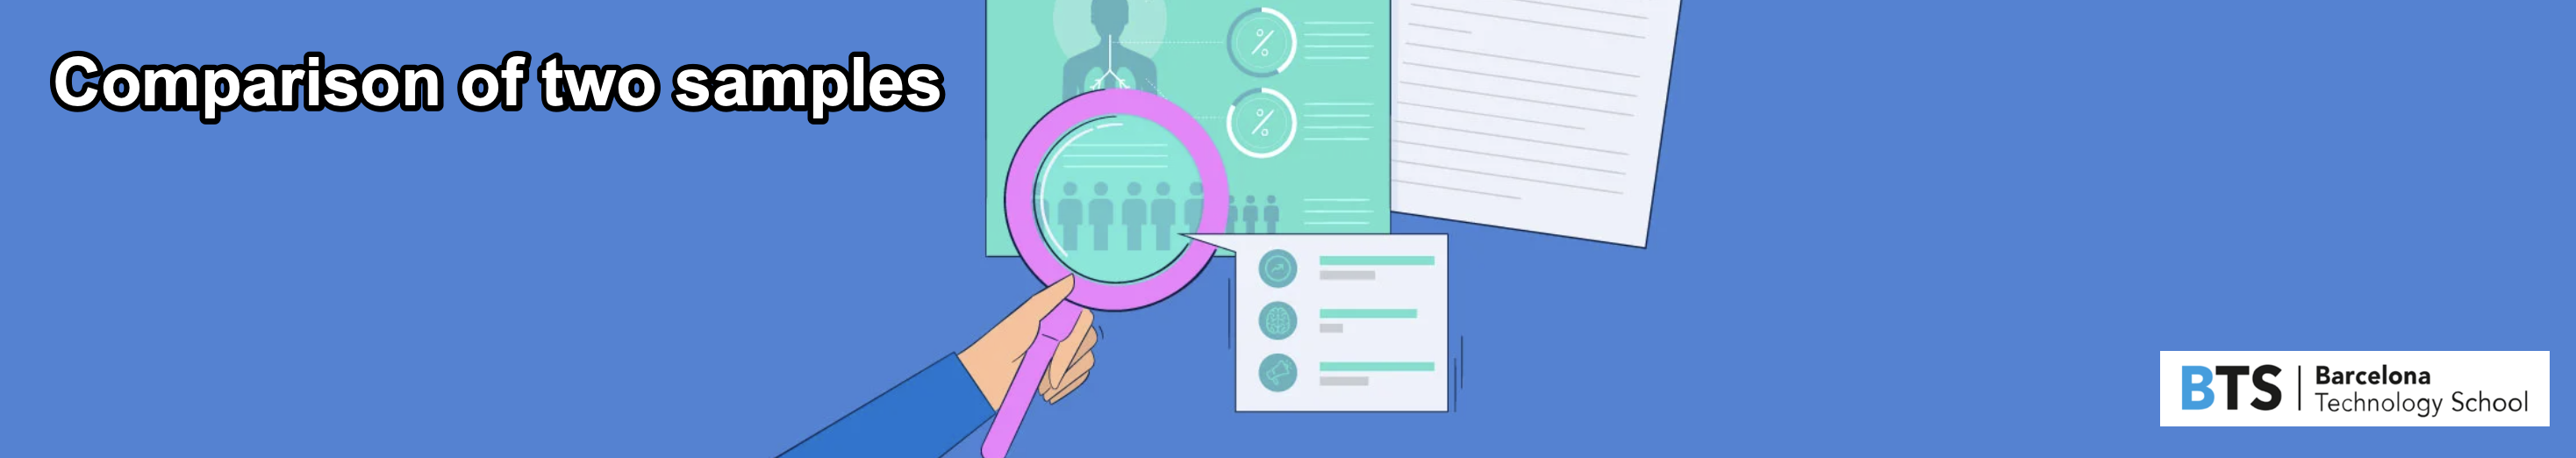

## Exercise 1. Longhand vs laptos.

A study randomly assigned students to take notes either longhand or using a laptop. The resulting scores of the students on a test of the material are given in the following table. Does the data provide evidence that it is more effective to take notes longhand rather than on a laptop?

In [5]:
longhand = [31.6, 42.9, 52.7, 23.1, 26.6, 27.5, 21.3, 21.3, 22.7, 25.0, 32.7, 50.1, 
15.5, 5.5, 31.3, 20.6, 28.3, 29.0, 40.4, 11.5, 35.4, 22.9, 5.5, 18.4, 
25.2, 29.2, 9.9, 19.7, 21.7, 18.8, 34.3, 18.0, 23.4, 25.7, 28.4, 30.5, 
39.7, 6.4]

laptop = [12.4, 6.3, 25.6, 24.7, 8.4, 12.0, 26.1, 17.5, 1.5, 25.1, 
 6.6, 19.9, 28.3, 26.6, 13.7, 23.9, 21.0, 13.4, 29.5, 17.0, 
 27.5, 0.3, 33.2, 30.1, 7.5, 18.5, 2.3, 15.0, 5.2, 30.2, 
 28.1, 23.4, 33.9, 15.7, 14.5, 22.9, 17.1, 15.6, 12.5, 19.0]


In [7]:
# Import necessary libraries
import numpy as np
import scipy.stats as stats

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(longhand, laptop, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The data provides evidence that taking notes longhand is more effective than using a laptop.")
else:
    print("The data does not provide sufficient evidence to conclude that taking notes longhand is more effective.")

T-statistic: 3.192178159856003
P-value: 0.002092840582210029
The data provides evidence that taking notes longhand is more effective than using a laptop.


## Exercise 2. Dogs and owners.
A study investigated whether dogs try to reach their owner faster if the owner is in distress. In the study, a dog’s owner sat behind a see-though magnetic door that the dog could push open. The dog-owner pairs were randomly assigned to either the distress condition (the owner said help in a distressed tone and made crying sounds) or the control condition (the ownersaid help in a neutral tone and made humming sounds). The response variable is the number of seconds until the dog opens the door, and the data is given here. Test to see whether mean time to open the door is significantly less for dogs with owners in distress than for dogs with owners not in distress. Use a 5% significance level.

In [10]:
# Import necessary libraries
import pandas as pd

In [12]:
ownerdog = pd.DataFrame({'Distress':[16.08347392, 33.7140336 , 18.50834336, 17.26222928, 35.85508774,
        10.83967155, 41.61211818, 39.03527751, 29.04295203, 14.73344735,
        15.80398277, 17.69512705, 38.83523995, 10.3319739 , 25.00830762,
        14.21035803,  8.68327658],'Control':[19.62378325, 26.77795019, 24.74388848, 22.0004481 , 55.48197899,
        14.66425231, 69.31974468, 61.69781417, 23.13975383, 22.3982567 ,
        28.19612522, 24.70539131, 37.97954592, 18.88652254, 42.5841152 ,
        20.56313257, 15.3668395 ]},index=range(1,18))
ownerdog.index.name = "Pair Owner-Dog"

In [14]:
# Calculate differences
ownerdog['Difference'] = ownerdog['Distress'] - ownerdog['Control']

# Perform paired t-test (one-tailed)
stat, p_value = stats.ttest_rel(ownerdog['Distress'], ownerdog['Control'], alternative='less')

# Print results
print("Paired t-test Results:")
print(f"t-statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Dogs with owners in distress open the door significantly faster.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean time.")

Paired t-test Results:
t-statistic: -3.6528
p-value: 0.0011
Reject the null hypothesis: Dogs with owners in distress open the door significantly faster.


## Exercise 3. Prisoner's dilemma.

A popular TV show features a final round where two contestants each make a decision to either split or steal the final jackpot. If both choose "split", they share the prize, but if one chooses "split" and the other picks "steal", the whole prize goes to the player who steals. If both choose "steal", they both win nothing. Some researchers collected data from 287 episodes, each with two participants, to give 574 "split" or "steal" decisions. Some results are displayed in the following table broken down by the age of the participant. Discuss if there's any difference in the strategy due to the age. Use a 5% significance level.

| Age Group | Split | Steal  | Total |
| :-: | :-: | :-: | :-: |
| **Under 40** | 187  | 195 | **382** |
| **Over 40** | 116 | 76 | **192** |
| **Total** | **303** | **271** | **574** |


In [27]:
from scipy.stats import chi2_contingency

# Observed data from the table
observed = np.array([[187, 195],   # Under 40: Split, Steal
                     [116,  76]]) # Over 40: Split, Steal

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(observed)

# Output results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Conclusion
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The strategy depends on age group.")
else:
    print("Fail to reject the null hypothesis: No evidence that strategy depends on age group.")

Chi-Square Test Statistic: 6.28571089770271
P-value: 0.012171524615540873
Degrees of Freedom: 1
Expected Frequencies:
 [[201.64808362 180.35191638]
 [101.35191638  90.64808362]]
Reject the null hypothesis: The strategy depends on age group.


## Exercise 4. Second chance prisoner's dilemma

In a sociological experiment, the final round "split or steal" is played twice. We only focus on the moves of those players that have been betrayed on the first move (the other player played "steal"). Here are the results. This table shows what they chose in the first move and what they chose in the second move. Remember they all were betrayed on the first move. Discuss wheter the players tend to keep or change the option in the second move if they are betrayed.

|  | Second | Move  |  |
| :-: | :-: | :-: | :-: |
| **First Move** | **Split** | **Steal**  | **Total** |
| **Split** | 30  | 113 | **143** |
| **Steal** | 71 | 57 | **128** |
| **Total** | **101** | **170** | **271** |


In [25]:
# Observed frequencies
observed = np.array([[30, 113],
                     [71, 57]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)


# Output results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("The p-value is less than 0.05. Reject the null hypothesis: the choice in the second move depends on the first move.")
else:
    print("The p-value is greater than or equal to 0.05. Fail to reject the null hypothesis: the choice in the second move is independent of the first move.")

Chi-Square Test Statistic: 32.90625787117386
P-value: 9.6711454209553e-09
Degrees of Freedom: 1
Expected Frequencies:
 [[53.29520295 89.70479705]
 [47.70479705 80.29520295]]
The p-value is less than 0.05. Reject the null hypothesis: the choice in the second move depends on the first move.
